In [1]:
%load_ext autoreload

%autoreload 2

In [2]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import osmnx as ox
from metroscore.network_builder import *
from shapely.geometry import Point, LineString

%config InlineBackend.figure_format = 'retina'

In [3]:
G = build_road_network(region="Beacon, NY")

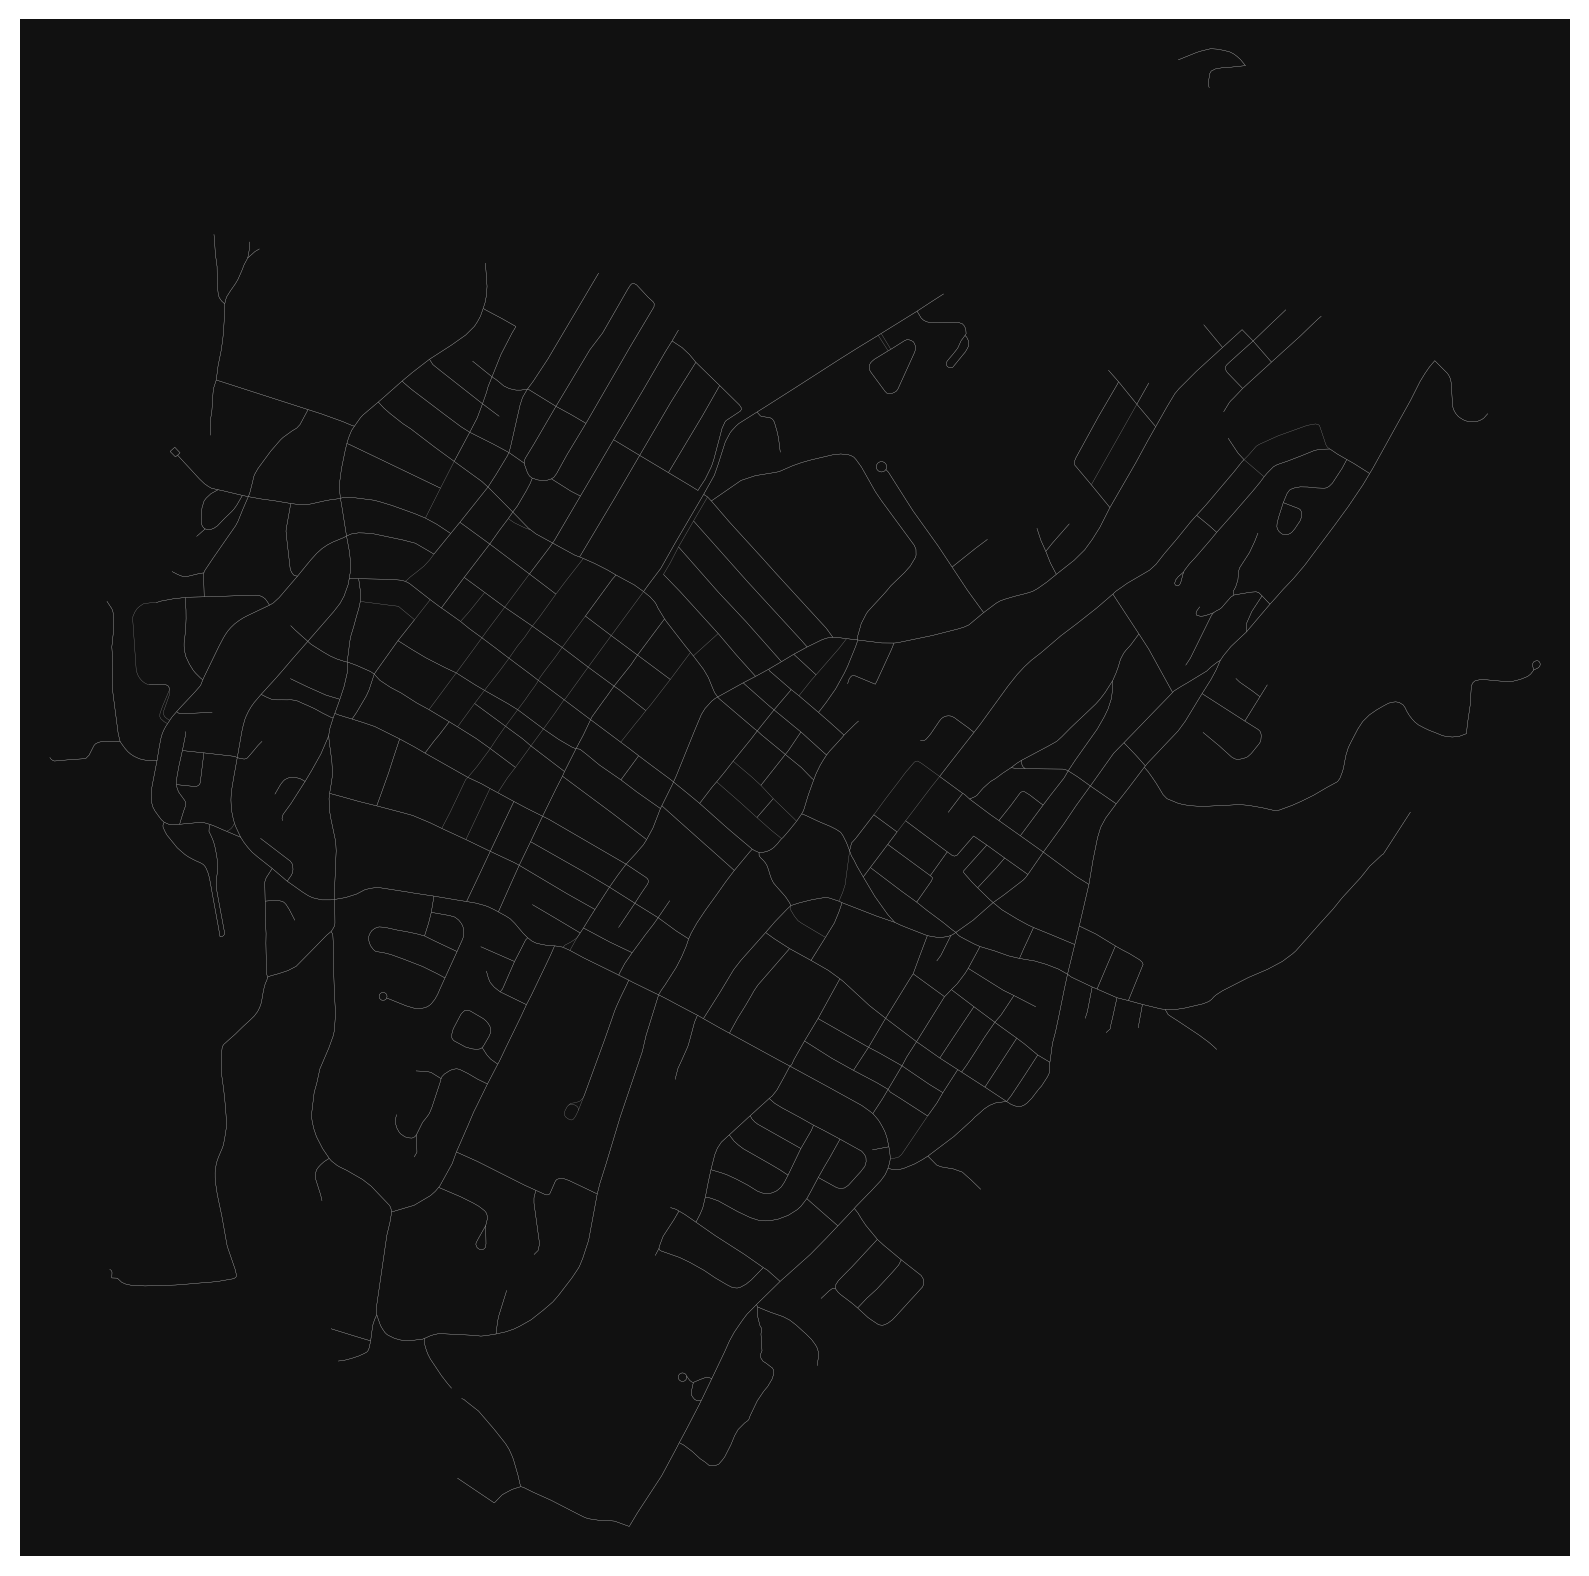

(<Figure size 1000x1000 with 1 Axes>, <Axes: >)

In [4]:
ox.plot_graph(G, figsize=(10, 10), node_size=0, edge_linewidth=0.1)

In [5]:
W = ox.graph_from_place(
    "Beacon, NY, USA",
    retain_all=False,
    truncate_by_edge=True,
    simplify=True,
    custom_filter='["railway"]',
)

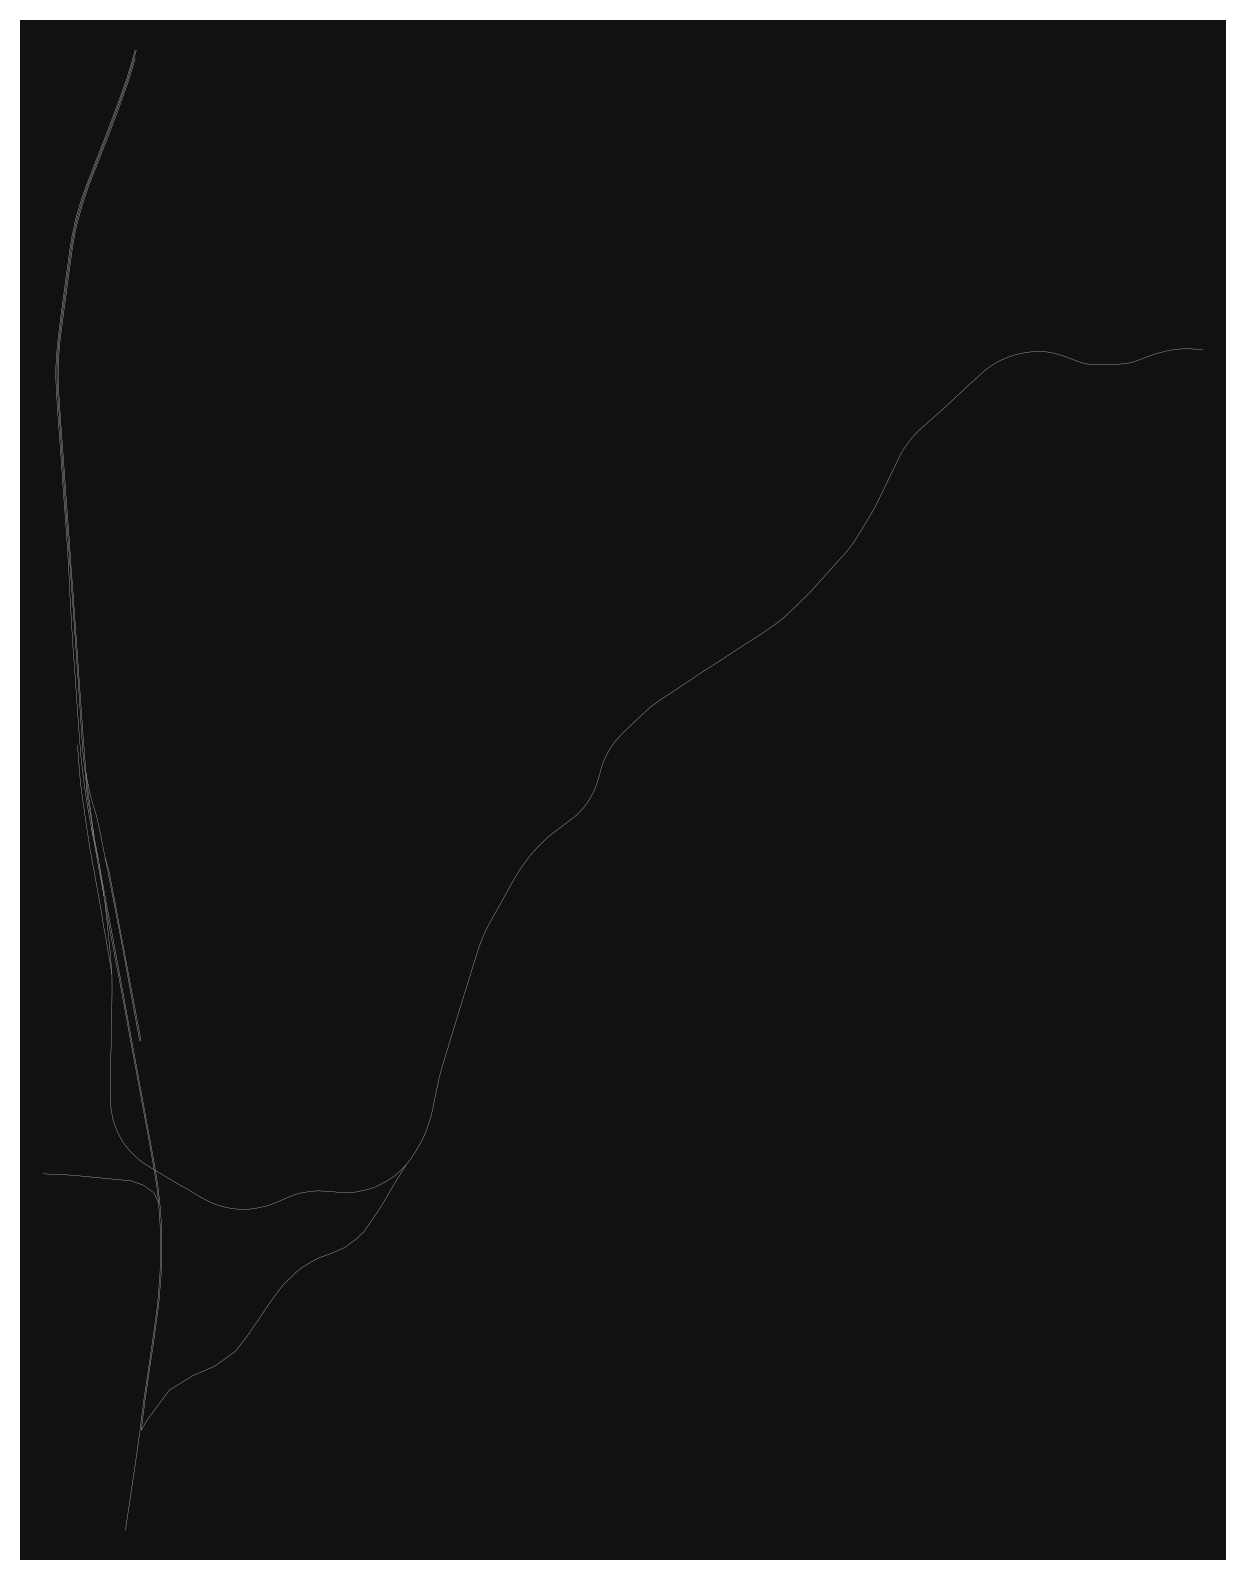

(<Figure size 1000x1000 with 1 Axes>, <Axes: >)

In [6]:
ox.plot_graph(W, figsize=(10, 10), node_size=0, edge_linewidth=0.1)

In [7]:
n, e = ox.graph_to_gdfs(W, nodes=True, edges=True, fill_edge_geometry=True)

W = ox.graph_from_gdfs(n, e)

In [8]:
any_given_edge = list(W.edges(data=True))[0]
any_given_edge

(261524243,
 261937769,
 {'osmid': [160294884, 160294885, 42641237, 42641238, 24140542],
  'name': 'Beacon Line',
  'maxspeed': ['10 mph', '25 mph'],
  'oneway': False,
  'reversed': False,
  'length': 1713.8209999999997,
  'bridge': 'yes',
  'geometry': <LINESTRING (-73.983 41.497, -73.983 41.496, -73.983 41.495, -73.983 41.495,...>})

In [9]:
list(any_given_edge[2]["geometry"].coords)

[(-73.9832504, 41.4967333),
 (-73.9832455, 41.4962121),
 (-73.9832567, 41.4954518),
 (-73.9832698, 41.4947497),
 (-73.9833013, 41.494048),
 (-73.9833061, 41.492853),
 (-73.9832999, 41.4926358),
 (-73.9832896, 41.4924498),
 (-73.9832092, 41.4921365),
 (-73.9831105, 41.4919017),
 (-73.9829926, 41.4916899),
 (-73.9828419, 41.4914712),
 (-73.9827023, 41.4913146),
 (-73.9826258, 41.491248),
 (-73.9825609, 41.4911795),
 (-73.9824157, 41.4910615),
 (-73.982129, 41.4908578),
 (-73.9819731, 41.4907648),
 (-73.9815822, 41.490573),
 (-73.9812405, 41.4904261),
 (-73.9804801, 41.4900842),
 (-73.9799501, 41.4898635),
 (-73.9794503, 41.4896315),
 (-73.9790028, 41.4894653),
 (-73.9787588, 41.4893977),
 (-73.9785354, 41.489349),
 (-73.9781639, 41.4892873),
 (-73.9778423, 41.4892677),
 (-73.9774708, 41.4892671),
 (-73.9771864, 41.4892897),
 (-73.9766763, 41.4893757),
 (-73.9763079, 41.4894724),
 (-73.9758089, 41.4896398),
 (-73.9754493, 41.489746),
 (-73.9751642, 41.4897961),
 (-73.9751007, 41.4898041),

In [10]:
W.nodes(data=True)[any_given_edge[0]]

{'y': 41.4967333, 'x': -73.9832504, 'street_count': 3}

In [11]:
p = Point(any_given_edge[2]["geometry"].coords[1])
p = Point(p.x + 0.001, p.y)

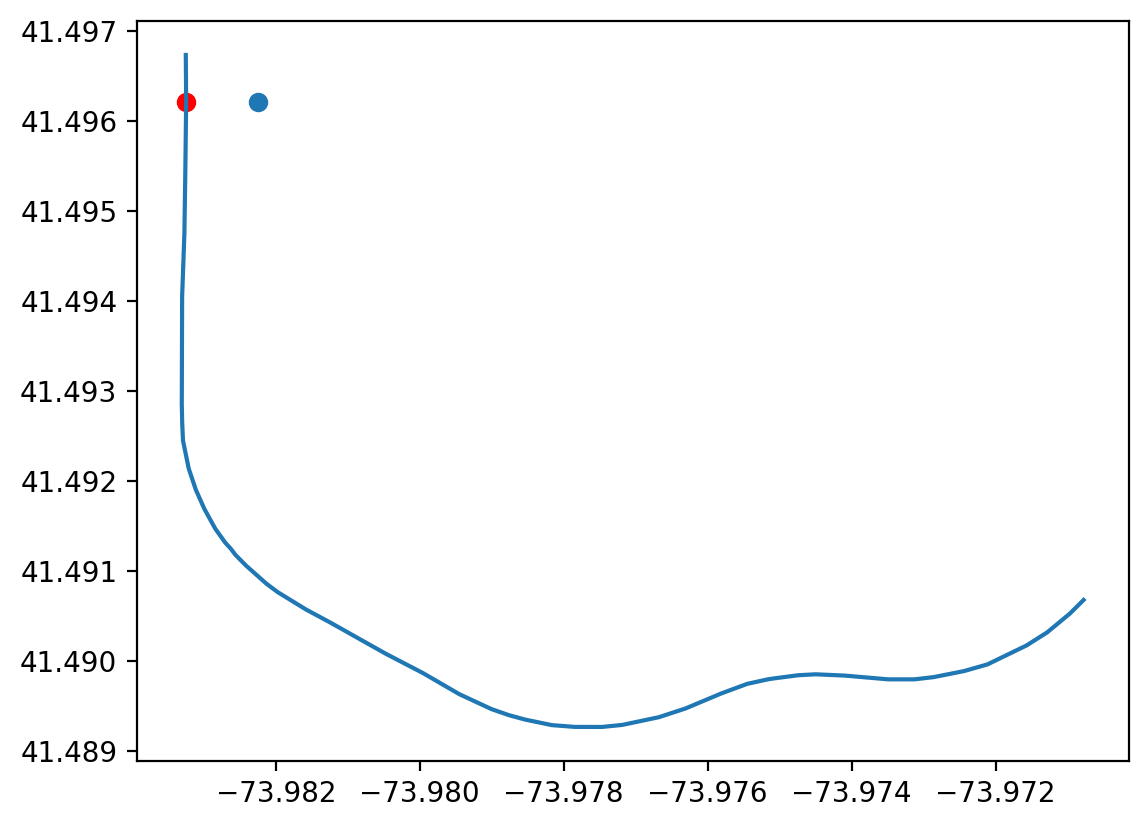

In [12]:
plt.scatter(p.x, p.y)
plt.plot(*any_given_edge[2]["geometry"].coords.xy)
proj = any_given_edge[2]["geometry"].interpolate(
    any_given_edge[2]["geometry"].project(p, normalized=True), normalized=True
)
plt.scatter(proj.x, proj.y, label="Projected - Shapely", c="red")

In [13]:
proj.xy

(array('d', [-73.9832455]), array('d', [41.4962121]))

In [7]:
from metroscore.utils import *

In [15]:
project_node_to_edge(node=W.nodes(data=True)[any_given_edge[0]], edge=any_given_edge).xy

(array('d', [-73.9832504]), array('d', [41.4967333]))

In [16]:
list(W.nodes(data=True))[0]

(261524243, {'y': 41.4967333, 'x': -73.9832504, 'street_count': 3})

In [17]:
G_proj = ox.project_graph(G, to_latlong=True)
W_proj = ox.project_graph(W, to_latlong=True)

In [18]:
G_proj.graph["crs"] == W_proj.graph["crs"]

True

In [19]:
Xs = []
Ys = []
for _id, node in G_proj.nodes(data=True):
    print(_id, node)
    if (node["x"] != node["lon"]) or (node["y"] != node["lat"]):
        print("Mismatched location!")
    Xs.append(node["x"])
    Ys.append(node["y"])

261509145 {'y': 41.5059318, 'x': -73.9794824, 'highway': 'turning_circle', 'street_count': 1, 'lon': -73.9794824, 'lat': 41.5059318}
261509152 {'y': 41.50543, 'x': -73.977876, 'street_count': 3, 'lon': -73.977876, 'lat': 41.50543}
261855051 {'y': 41.5050907, 'x': -73.9780389, 'street_count': 3, 'lon': -73.9780389, 'lat': 41.5050907}
261835049 {'y': 41.5063306, 'x': -73.9776159, 'highway': 'traffic_signals', 'street_count': 4, 'lon': -73.9776159, 'lat': 41.5063306}
261517184 {'y': 41.4980188, 'x': -73.9718302, 'street_count': 3, 'lon': -73.9718302, 'lat': 41.4980188}
261829830 {'y': 41.498329, 'x': -73.9726799, 'street_count': 3, 'lon': -73.9726799, 'lat': 41.498329}
261915390 {'y': 41.496574, 'x': -73.97276, 'street_count': 3, 'lon': -73.97276, 'lat': 41.496574}
10979240465 {'y': 41.4994449, 'x': -73.9709188, 'street_count': 3, 'lon': -73.9709188, 'lat': 41.4994449}
261519631 {'y': 41.511838, 'x': -73.982081, 'street_count': 1, 'lon': -73.982081, 'lat': 41.511838}
261848698 {'y': 41.51

In [20]:
len(Xs), len(Ys)

(501, 501)

In [21]:
list(dict(G.nodes(data=True)).values())[0]

{'y': 41.5059318,
 'x': -73.9794824,
 'highway': 'turning_circle',
 'street_count': 1}

In [22]:
nn, dist = ox.distance.nearest_nodes(G=W_proj, X=Xs, Y=Ys, return_dist=True)

In [23]:
dict(zip(G_proj.nodes, zip(nn, dist)))

{261509145: (1716522939, 485.28156656108445),
 261509152: (1716522939, 590.9171508981522),
 261855051: (1716522939, 568.6965943707839),
 261835049: (1716522939, 644.9829901492405),
 261517184: (261937769, 820.9695104845227),
 261829830: (261937769, 865.4052831800955),
 261915390: (261937769, 676.1103029649305),
 10979240465: (261937769, 974.90872797946),
 261519631: (1716522939, 897.7945352128446),
 261848698: (1716522939, 1046.618582542953),
 261526707: (261937859, 1781.8107728021448),
 3659100605: (261937859, 1857.5876789457798),
 261527681: (261937769, 458.2411675419755),
 261527699: (261937769, 295.75918701948206),
 261854999: (1311936485, 516.2857713017642),
 261847038: (261937769, 501.90758536735177),
 261528445: (261937859, 1217.5770288968943),
 261824315: (261937859, 1379.1942927081875),
 261538925: (261937859, 1243.1921828997713),
 261950507: (261937859, 1071.7437172607563),
 261544065: (261937769, 1933.46097250922),
 261544073: (261937769, 1922.2072093003214),
 261880559: (26

In [63]:
get_merge_mapping(G, W)

MergeMapping(n2n={261509145: (1716522939, 485.28156656108445), 261509152: (1716522939, 590.9171508981522), 261855051: (1716522939, 568.6965943707839), 261835049: (1716522939, 644.9829901492405), 261517184: (261937769, 820.9695104845227), 261829830: (261937769, 865.4052831800955), 261915390: (261937769, 676.1103029649305), 10979240465: (261937769, 974.90872797946), 261519631: (1716522939, 897.7945352128446), 261848698: (1716522939, 1046.618582542953), 261526707: (261937859, 1781.8107728021448), 3659100605: (261937859, 1857.5876789457798), 261527681: (261937769, 458.2411675419755), 261527699: (261937769, 295.75918701948206), 261854999: (1311936485, 516.2857713017642), 261847038: (261937769, 501.90758536735177), 261528445: (261937859, 1217.5770288968943), 261824315: (261937859, 1379.1942927081875), 261538925: (261937859, 1243.1921828997713), 261950507: (261937859, 1071.7437172607563), 261544065: (261937769, 1933.46097250922), 261544073: (261937769, 1922.2072093003214), 261880559: (2619378

In [ ]:
W.get_edge_data(any_given_edge[0], any_given_edge[1])

{0: {'osmid': [160294884, 160294885, 42641237, 42641238, 24140542],
  'name': 'Beacon Line',
  'maxspeed': ['25 mph', '10 mph'],
  'oneway': False,
  'reversed': False,
  'length': 1713.8209999999997,
  'bridge': 'yes',
  'geometry': <LINESTRING (-73.983 41.497, -73.983 41.496, -73.983 41.495, -73.983 41.495,...>}}

In [ ]:
from geopy.distance import distance, lonlat

In [ ]:
(W.nodes[any_given_edge[0]]["x"], W.nodes[any_given_edge[0]]["y"])

(-73.9832504, 41.4967333)

In [ ]:
distance(
    lonlat(G.nodes[any_given_edge[0]]["x"], G.nodes[any_given_edge[0]]["y"]),
    lonlat(G.nodes[any_given_edge[1]]["x"], G.nodes[any_given_edge[1]]["y"]),
).m

145.23522670819142

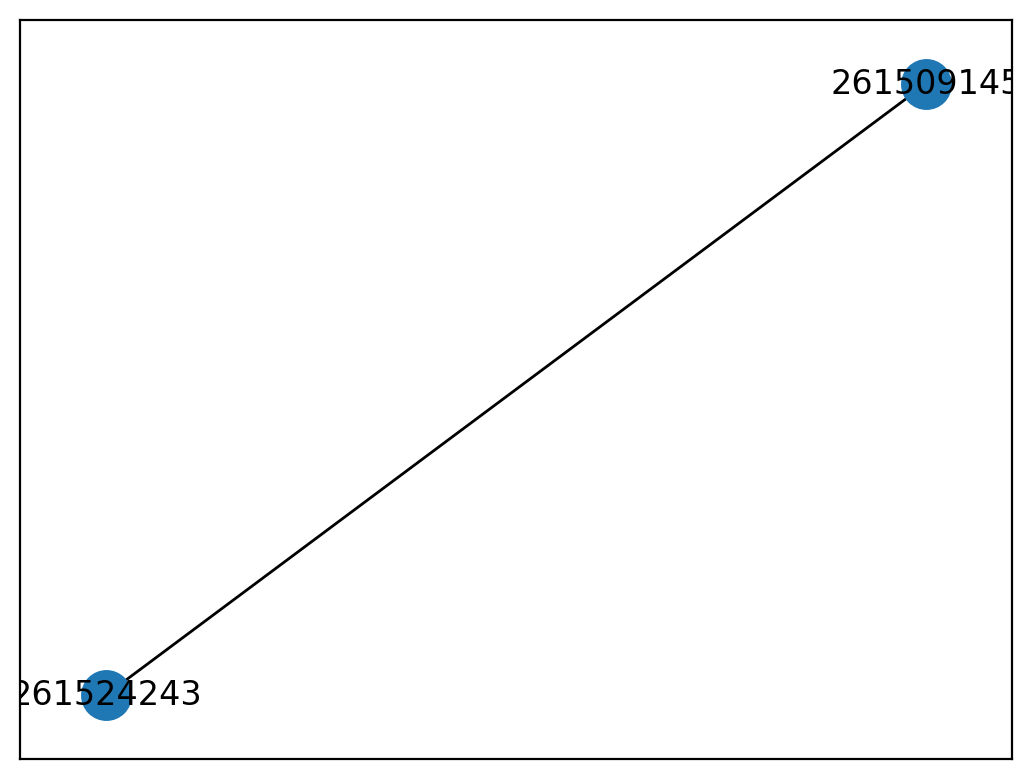

In [33]:
new_edge = merge_node_to_node(list(G.nodes(data=True))[0], list(W.nodes(data=True))[0])

temp_graph = nx.Graph()
temp_graph.add_node(list(G.nodes)[0])
temp_graph.add_node(list(W.nodes)[0])
temp_graph.add_edge(new_edge[0], new_edge[1], **new_edge[2])

nx.draw_networkx(temp_graph)

In [9]:
def __merge_dicts_on_key(
    a: dict, b: dict, overwrite_if: Callable[[Any, Any], bool]
) -> dict:
    """Merge dict `b` into dict `a`. When encountering a key that already exists in `a`,
    take the values of the conflicting key and compare them using a function `key`.
    If the output of the `key` function is True, prefer the original value from `a`.
    If the output is False, prefer the value from `b`.

    Args:
        a: dict
        b: dict
        overwrite_if: Callable[[Any, Any], bool]
            Function that takes two values and returns True if the new value is preferred,
            False otherwise.

    Returns:
        dict: Merged dictionary.
    """
    merged = a.copy()
    for k, v in b.items():
        merged[k] = v if overwrite_if(merged.get(k), v) else merged[k]
    return merged

In [12]:
mapping = get_merge_mapping(W, G)
all_merges = __merge_dicts_on_key(
    mapping.n2n, mapping.n2e, overwrite_if=lambda a, b: a[-1] < b[-1]
)
all_merges

{261524243: (261919752, 332.4535169351085),
 261937769: (261922178, 148.17681005166673),
 1065881815: (261919752, 280.7877999560269),
 1716522939: (261876714, 50.570882928341256),
 261937658: (261910875, 934.511101020941),
 1311936474: (261900760, 151.77597418610372),
 512001464: (261895078, 814.698723539353),
 261937859: (261915170, 554.7407438285072),
 7100409516: (261900760, 245.99029444802366),
 554931715: (11329751015, 149.82624871418565),
 1716522808: (261913510, 270.01288829825694),
 7100409517: (261919752, 285.94565963265933),
 1065881825: (261900760, 125.25252702801637),
 7424249593: (261900760, 231.74664880338946),
 1312321908: (261910875, 936.8242287302864),
 1065925729: (261900760, 96.61247577717984),
 1312321902: (261910875, 906.9541870781625),
 1311936475: (261818724, 221.38388947873347),
 1311936485: (261855073, 317.9173716866094),
 1311936513: (261855073, 322.5215866249958),
 1716522710: (261895078, 1096.4847918732269)}

In [76]:
G.get_edge_data(261919752, 11329751015)[0]

{'osmid': [42641240, 42641241, 42641239, 24185535],
 'name': 'Dennings Avenue',
 'highway': 'residential',
 'oneway': False,
 'reversed': False,
 'length': 1235.015,
 'access': 'permissive',
 'bridge': 'yes',
 'geometry': <LINESTRING (-73.98 41.499, -73.98 41.499, -73.98 41.499, -73.98 41.498, -73...>}

In [20]:
merged_W = merge_graphs(W, other=G)

261524243 (261919752, 11329751015) 0.0013156880705742636
261937769 (261922175, 261847052) 0.0010152335101530432
1065881815 (261919752, 11329751015) 0.002929289766610665
1716522939 (261844053, 261876714) 0.00027285784229932056
512001464 (261828157, 261828150) 0.008203386317854135
261937859 (261915170, 10568677429) 0.0055870773504557315
7100409517 (261919752, 11329751015) 0.0030309495707499697
1716522808 (261828150, 261913510) 0.0031845331164853897
261937658 (261838429, 261948363) 0.009372440715742527
1311936474 (261790249, 261900760) 0.0013955789049760806
7424249593 (261790249, 261900760) 0.002091275486400939
1065925729 (261844053, 261900760) 0.0006701430165137421
7100409516 (261790249, 261900760) 0.002217425320054546
554931715 (261919752, 11329751015) 0.0014542763870690528
1716522710 (261828157, 261828150) 0.011340247227025079
1065881825 (261790249, 261900760) 0.001185370870243599
1312321908 (261838429, 261948363) 0.009383873760875957
1312321902 (261838429, 261948363) 0.009096612356809

In [21]:
ox.graph_to_gdfs(W, nodes=True, edges=False)

,y,x,street_count,ref,geometry
osmid,,,,,
261524243,41.496733,-73.983250,3,NaN,POINT (-73.98325 41.49673)
261937658,41.526084,-73.982215,1,NaN,POINT (-73.98221 41.52608)
261937769,41.490678,-73.970776,3,NaN,POINT (-73.97078 41.49068)
261937859,41.516555,-73.936978,3,NaN,POINT (-73.93698 41.51655)
512001464,41.482249,-73.982007,3,NaN,POINT (-73.98201 41.48225)
554931715,41.490392,-73.986165,1,NaN,POINT (-73.98616 41.49039)
1065881815,41.499071,-73.983554,3,42,POINT (-73.98355 41.49907)
1065881825,41.501398,-73.984125,3,12B,POINT (-73.98413 41.50140)
1065925729,41.503090,-73.984345,3,NaN,POINT (-73.98435 41.50309)


In [24]:
ox.graph_to_gdfs(merged_W, nodes=True, edges=False)

,y,x,street_count,ref,lat,lon,geometry,highway
osmid,,,,,,,,
261524243,41.496733,-73.983250,3.0,NaN,NaN,NaN,POINT (-73.98325 41.49673),NaN
261937769,41.490678,-73.970776,3.0,NaN,NaN,NaN,POINT (-73.97078 41.49068),NaN
1065881815,41.499071,-73.983554,3.0,42,NaN,NaN,POINT (-73.98355 41.49907),NaN
1716522939,41.504008,-73.984713,1.0,NaN,NaN,NaN,POINT (-73.98471 41.50401),NaN
261937658,41.526084,-73.982215,1.0,NaN,NaN,NaN,POINT (-73.98221 41.52608),NaN
...,...,...,...,...,...,...,...,...
7824959085,41.508531,-73.983318,1.0,NaN,NaN,NaN,POINT (-73.98332 41.50853),NaN
261912176,41.518251,-73.949062,1.0,NaN,NaN,NaN,POINT (-73.94906 41.51825),NaN
341285554,41.517812,-73.977382,3.0,41,NaN,NaN,POINT (-73.97738 41.51781),motorway_junction


In [25]:
dict(map(lambda x: ((x[0], x[1]), x[2]), merged_W.edges(data=True)))

{(261524243,
  261937769): {'osmid': [160294884,
   160294885,
   42641237,
   42641238,
   24140542], 'name': 'Beacon Line', 'maxspeed': ['25 mph',
   '10 mph'], 'oneway': False, 'reversed': False, 'length': 1713.8209999999997, 'bridge': 'yes', 'geometry': <LINESTRING (-73.983 41.497, -73.983 41.496, -73.983 41.495, -73.983 41.495,...>},
 (261524243, 1065881815): {'osmid': 24140542,
  'name': 'Beacon Line',
  'maxspeed': '10 mph',
  'oneway': False,
  'reversed': True,
  'length': 261.152,
  'geometry': <LINESTRING (-73.983 41.497, -73.983 41.498, -73.983 41.498, -73.984 41.499)>},
 (261524243, 1716522939): {'osmid': [159543669, 116359807],
  'oneway': False,
  'reversed': False,
  'length': 818.558,
  'geometry': <LINESTRING (-73.983 41.497, -73.983 41.497, -73.984 41.498, -73.984 41.498,...>,
  'service': 'spur'},
 (261937769,
  512001464): {'osmid': [41657677,
   160294900,
   160294901,
   160294902,
   160294903], 'oneway': False, 'reversed': False, 'length': 1358.8680000000002, 

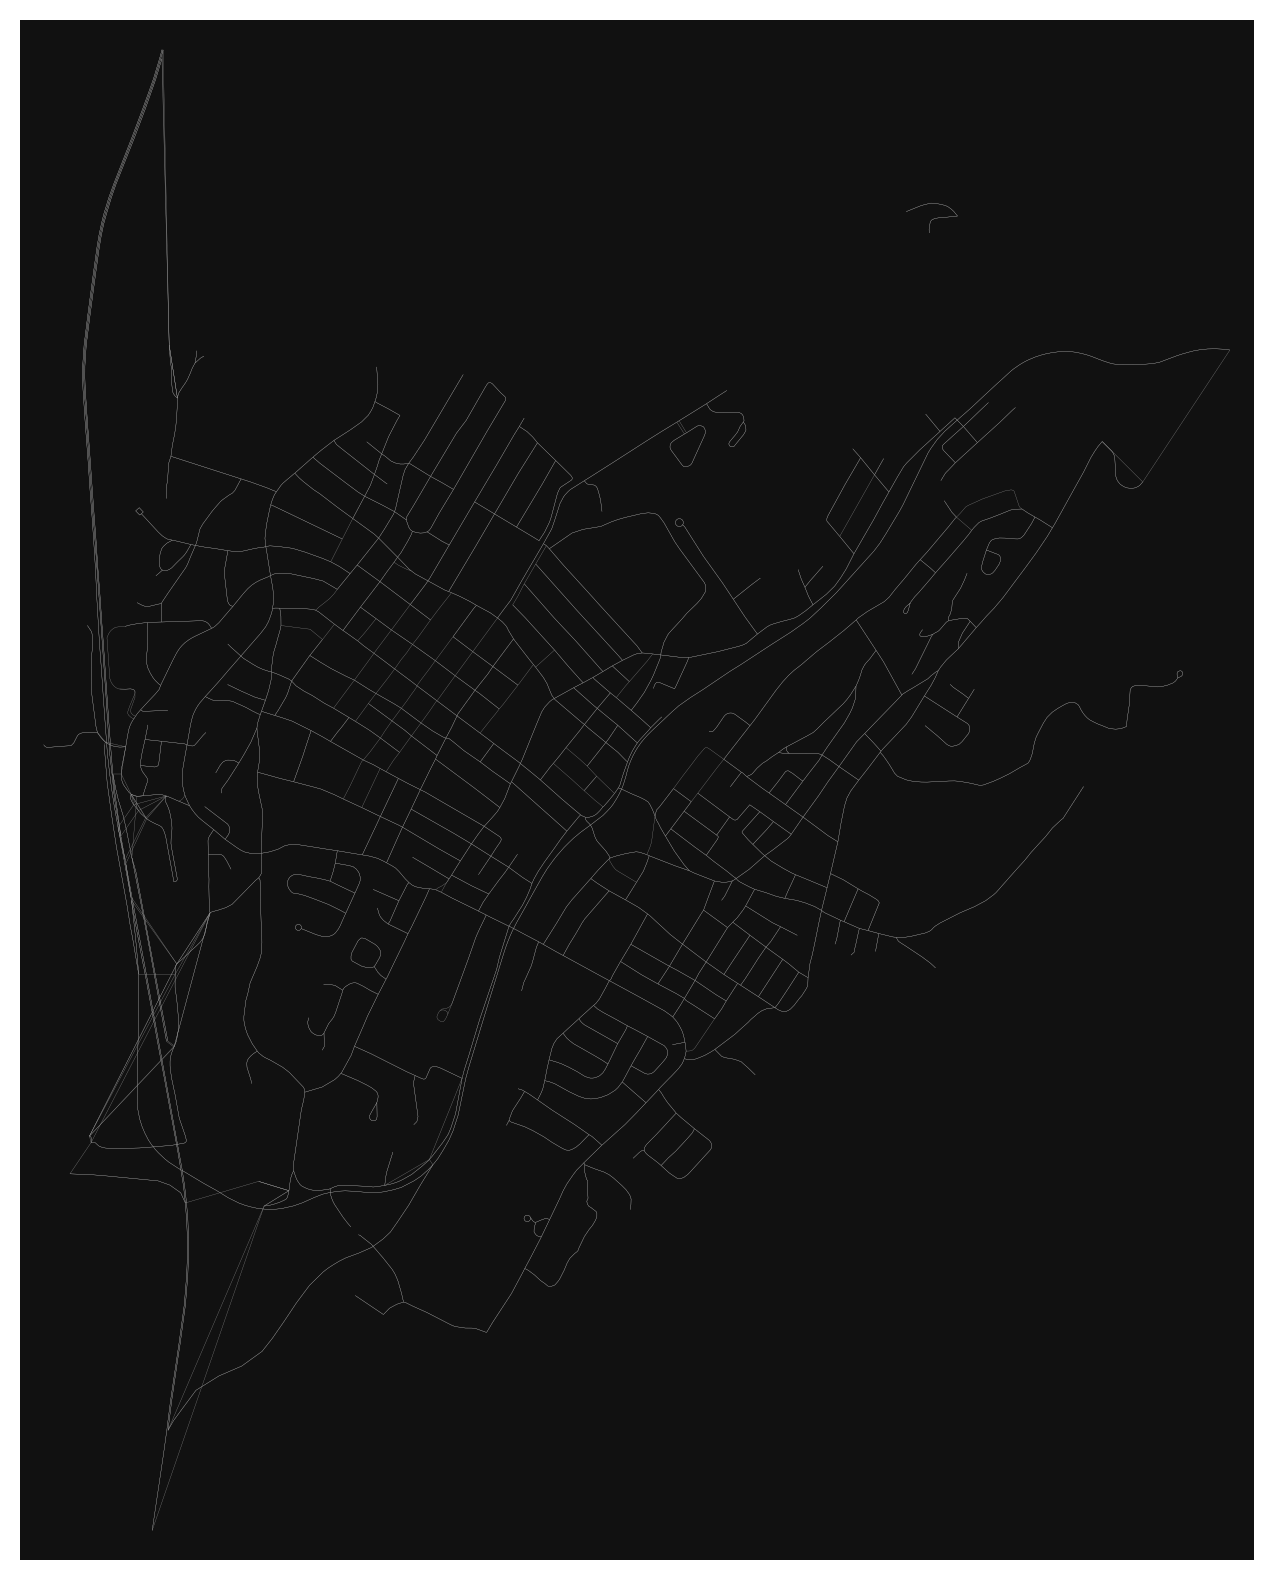

(<Figure size 1000x1000 with 1 Axes>, <Axes: >)

In [26]:
ox.plot_graph(merged_W, figsize=(10, 10), node_size=0, edge_linewidth=0.1)

## Edge to node mapping

We want to map nodes in `a` to edges in `other`. Example. `a` is a bus network and `other` is a street network, so we want to model people getting off the bus and walking. Sometimes the coordinates of nodes in `a` don't sit perfectly along edges in `other`, so we need to project them together within a certain tolerance.